### Inhaltsverzeichnis

* [1. Business Understanding](#chapter1)
    * [1.1. Projektbeschreibung](#section_1_1)
    * [1.2. Data Dictionary](#section_1_2)
* [2. Data Understanding](#chapter2)
    * [2.1. Pakete importieren](#section_2_1)
    * [2.2. Daten einlesen](#section_2_2)
    * [2.3. Datensatz anzeigen](#section_2_3)
    * [2.4. Spaltennamen und Datentypen](#section_2_4)
    * [2.5. Datentypen anpassen](#section_2_5)
    * [2.6. Deskriptive Analyse](#section_2_6)
        * [2.6.1 Kennzahlen zur Beschreibung des Datensatz](#section_2_6_1)
        * [2.6.2 Prüfung auf Missing Values](#section_2_6_2)
        * [2.6.3 Histogramm der Variablen Age und Driving_License](#section_2_6_3)
        * [2.6.4 Balkendiagramm der Variablen Age, Vehicle_Age und Gender](#section_2_6_4)
    * [2.7. Korrelation der Variablen](#section_2_7)
    * [2.8. Interpretation der Variablen](#section_2_8)
        * [2.8.1 Interpretation der Variable Gender](#section_2_8_1)
        * [2.8.2 Interpretation der Variable Age](#section_2_8_2)
        * [2.8.3 Interpretation der Variable Driving_License](#section_2_8_3)
        * [2.8.4 Interpretation der Variable Region_Code](#section_2_8_4)
        * [2.8.5 Interpretation der Variable Previously_Insured](#section_2_8_5)
        * [2.8.6 Interpretation der Variable Vehicle_Age](#section_2_8_6)
        * [2.8.7 Interpretation der Variable Vehicle_Damage](#section_2_8_7)
        * [2.8.8 Interpretation der Variable Annual_Premium](#section_2_8_8)
        * [2.8.9 Interpretation der Variable Policy_Sales_Channel](#section_2_8_9)
        * [2.8.10 Interpretation der Variable Vintage](#section_2_8_10)
        * [2.8.11 Interpretation der Variable Response](#section_2_8_11)
* [3. Data Preparation](#chapter3)
    * [3.1. Ausreißer behandeln](#section_3_1)
        * [3.1.1 Ausreißer innerhalb der Variable Age](#section_3_1_1)
        * [3.1.2 Ausreißer innerhalb der Variable](#section_3_1_2)
    * [3.2. Analyse der nicht vorhandenen Werte](#section_3_2)
    * [3.3. Imputation der fehlenden Werte](#section_3_3)
        * [3.3.1 Variante 1: Ersetzung der fehlenden Werte durch den Mittelwert](#section_3_3_1)
            * [3.3.1.1 Behandlung der Variable age](#section_3_3_1_1)
            * [3.3.1.2 Behandlung der Variable day](#section_3_3_1_2)
        * [3.3.2 Variante 2: Ersetzung der fehlenden Werte durch den Median](#section_3_3_2)
            * [3.3.2.1 Behandlung der Variable age](#section_3_3_2_1)
            * [3.3.2.2 Behandlung der Variable day](#section_3_3_2_2)
        * [3.3.3 Variante 3: Ersetzung der fehlenden Werte mithilfe einer linearen Regression](#section_3_3_3)
            * [3.3.3.1 Behandlung der Variable age](#section_3_3_3_1)
            * [3.3.3.2 Behandlung der Variable day](#section_3_3_3_2)
        * [3.3.4 Variante 2: Ersetzung der fehlenden Werte mithilfe eines Random Forest Modells](#section_3_3_4)
            * [3.3.4.1 Behandlung der Variable age](#section_3_3_3_1)
            * [3.3.4.2 Behandlung der Variable day](#section_3_3_3_2)
        * [3.3.5 Fazit](#section_3_3_5)
    * [3.4. Sampling](#section_3_4)
        * [3.4.1. Undersampling](#section_3_4_1)
        * [3.4.2. Oversampling](#section_3_4_2)
    * [3.5. Feature Engineering](#section_3_5)
        * [3.5.1. Altersklassen als Feature](#section_3_5_1)
        * [3.5.2. Features durch Aggregationen, Differenzen und Verhältnisse](#section_3_5_2)
        * [3.5.3. Features durch Datumsfunktionen](#section_3_5_3)
             * [3.5.3.1 Festlegung des aktuellen Jahres](#section_3_5_3_1)
             * [3.5.3.2 Berechnung weiterer Features anhand von Datumsfunktionen](#section_3_5_3_2)
        * [3.5.4. Zyklische Transformation der Datumsvariablen](#section_3_5_4)
        * [3.5.5. weitere Features](#section_3_5_5)
    * [3.6. Feature Selection](#section_3_6)
    * [3.7. Final Preprocessing](#section_3_7)
* [4. Modeling](#chapter4)
    * [4.1. Aufteilung in Test- und Trainingsdaten](#section_4_1)
    * [4.2. Modell: RandomForest](#section_4_2)
* [5. Evaluation](#chapter5)
* [6. Anwendung](#chapter6)
* [7. Deployment](#chapter7)

* [Model Explainer mit SHAP Values](#chapter8)

    * [Fazit zum Model Explainer mit SHAP Values](#section_8_1)
        
    
    
    
  

### 1. Business Understanding <a class="anchor" id="chapter1"></a>

#### 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

#### 1.2 Data Dictionary <a class="anchor" id="section_1_2"></a>

### 2. Data Understanding <a class="anchor" id="chapter2"></a>

#### 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [3]:
import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
# import seaborn as sns

#### 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wird zur Analyse eingelesen und lesbar gemacht:

- Entfernung des Trennzeichen "$".
- Umwandlung von "YES"- Zelleninhalte in True Values und "NO"- Zelleninhalten in False Values.
- Einrücken des Datensatz mit der ".shift"- Funktion.
- Löschen einer Unbenannten Spalte die durch das Einrücken entstanden ist.

In [25]:
datensatz = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"]
)
datensatz = datensatz.shift(axis=1)
del datensatz["Unnamed: 0"] #test1


/home/jannick/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
datensatz = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    low_memory=False
)
#test1
# datensatz = datensatz.shift(axis=1)
# del datensatz["Unnamed: 0"]


# datensatz["Response"] = datensatz["Response"].astype("bool")

# datensatz.iloc[[7504, 7505]]
datensatz.head(20)

# datensatz["Driving_License"] = datensatz["Driving_License"].astype("bool")
# datensatz["Previously_Insured"] = datensatz["Previously_Insured"].astype("bool")
# datensatz["Vehicle_Damage"] = datensatz["Vehicle_Damage"].astype("bool")

# datensatz["Driving_License"].unique()

# datensatz.info()



,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,True
1,1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,False
2,2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,True
3,3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,False
4,4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,False
5,5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,False
6,6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,False
7,7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,True
8,8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,False
9,9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,False


In [19]:
datensatz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            380999 non-null  int64  
 1   id                    380999 non-null  int64  
 2   Gender                379948 non-null  object 
 3   Age                   370107 non-null  object 
 4   Driving_License       380948 non-null  object 
 5   Region_Code           380999 non-null  object 
 6   Previously_Insured    380948 non-null  object 
 7   Vehicle_Age           380948 non-null  object 
 8   Vehicle_Damage        380948 non-null  object 
 9   Annual_Premium        380999 non-null  float64
 10  Policy_Sales_Channel  380999 non-null  object 
 11  Vintage               380948 non-null  object 
 12  Response              380999 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 35.2+ MB


#### 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zehn Einträge angezeigt:

In [26]:
datensatz.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,1
1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,0
2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,1
3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,0
4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,0
5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,0
6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,0
7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,1
8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,0
9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,0


#### 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen von den Variablen.

In [4]:
datensatz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    380999 non-null  int64  
 1   Gender                379948 non-null  object 
 2   Age                   370107 non-null  object 
 3   Driving_License       380948 non-null  object 
 4   Region_Code           380999 non-null  object 
 5   Previously_Insured    380948 non-null  object 
 6   Vehicle_Age           380948 non-null  object 
 7   Vehicle_Damage        380948 non-null  object 
 8   Annual_Premium        380999 non-null  float64
 9   Policy_Sales_Channel  380999 non-null  object 
 10  Vintage               380948 non-null  object 
 11  Response              380999 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 37.8+ MB


#### 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

In [32]:
def datentypen_ändern(datensatz):
    #Umwandlung in den Int64 Datentyp
    datensatz["Age"] = pd.to_numeric(datensatz["Age"], errors="coerce")   
    datensatz["Age"] = datensatz['Age'].astype('Int64') 

    datensatz["Region_Code"] = pd.to_numeric(datensatz["Region_Code"], errors="coerce")
    datensatz["Region_Code"] = datensatz['Region_Code'].astype('Int64')
    
    datensatz["Vintage"] = pd.to_numeric(datensatz["Vintage"], errors="coerce")
    datensatz["Vintage"] = datensatz['Vintage'].astype('Int64')
    
    datensatz["Policy_Sales_Channel"] = pd.to_numeric(datensatz["Policy_Sales_Channel"], errors="coerce")
    datensatz["Policy_Sales_Channel"] = datensatz['Policy_Sales_Channel'].astype('Int64')
    
    #Umwandlung in den bool Datentyp
    datensatz["Driving_License"] = datensatz["Driving_License"].astype("bool")
    datensatz["Previously_Insured"] = datensatz["Previously_Insured"].astype("bool")
    datensatz["Vehicle_Damage"] = datensatz["Vehicle_Damage"].astype("bool")
    
    datensatz["Response"] = pd.to_numeric(datensatz["Response"])
    datensatz["Response"] = datensatz["Response"].astype("bool")
    
datentypen_ändern(datensatz)

Die Änderung der Datentypen ist hier zu sehen:

In [16]:
datensatz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    380999 non-null  int64  
 1   Gender                379948 non-null  object 
 2   Age                   369906 non-null  Int64  
 3   Driving_License       380999 non-null  bool   
 4   Region_Code           380998 non-null  Int64  
 5   Previously_Insured    380999 non-null  bool   
 6   Vehicle_Age           380948 non-null  object 
 7   Vehicle_Damage        380999 non-null  bool   
 8   Annual_Premium        380999 non-null  float64
 9   Policy_Sales_Channel  380998 non-null  Int64  
 10  Vintage               380947 non-null  Int64  
 11  Response              380999 non-null  bool   
dtypes: Int64(4), bool(4), float64(1), int64(1), object(2)
memory usage: 29.1+ MB


In [22]:
datensatz.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,False,28,False,> 2 Years,True,40454.0,26,217,True
1,2,Male,76,False,3,False,1-2 Year,False,33536.0,26,183,True
2,3,Male,47,False,28,False,> 2 Years,True,38294.0,26,27,True
3,4,Male,21,True,11,True,< 1 Year,False,28619.0,152,203,True
4,5,Female,29,True,41,True,< 1 Year,False,27496.0,152,39,True
5,6,Female,24,False,33,False,< 1 Year,True,2630.0,160,176,True
6,7,Male,23,False,11,False,< 1 Year,True,23367.0,152,249,True
7,8,Female,56,False,28,False,1-2 Year,True,32031.0,26,72,True
8,9,Female,24,True,3,True,< 1 Year,False,27619.0,152,28,True
9,10,Female,32,True,6,True,< 1 Year,False,28771.0,152,80,True


#### 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

##### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [11]:
kennzahlen = pd.DataFrame(datensatz)
kennzahlen.describe(include = "all").transpose() # unter berücksichtigung kategorialer Ausprägungen

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999,NaN,NaN,NaN,190500,109985,1,95250.5,190500,285750,380999
Gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,370107,284,24,21572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_License,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,380999,107,28,87921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,380948,2,True,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,380999,NaN,NaN,NaN,30527.7,17243,-9997,24371,31656,39390,540165
Policy_Sales_Channel,380999,282,152,111380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden erläutert:

##### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

In [13]:
datensatz.isna().sum() # bsp: Gender : hat 1051 Missing Values

Unnamed: 0                  0
id                          0
Gender                   1051
Age                     10892
Driving_License            51
Region_Code                 0
Previously_Insured          0
Vehicle_Age                51
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                    51
Response                    0
dtype: int64

##### 2.6.3 Histogramm der Variablen Age und Driving_License <a class="anchor" id="section_2_6_3"></a>

In [12]:
sns.set(rc={"figure.figsize":(10, 5)})     #größe des plots ändern

histogram =sns.histplot(data =datensatz, x= "Age", 
                        binwidth= 1, alpha= 0.7,
                        hue= "Driving_License",)
                        

histogram.set_xlabel("Alter", fontsize = 13.5)
histogram.set_ylabel("Anzahl", fontsize = 13.5)

histogram.set_xlim(0, 100)
histogram.set_xticks(range(0,101, 10))

histogram.set_ylim(0, 20000)
histogram.set_yticks(range(0,20001, 2500))

histogram.set_title("Histogram:" + "\n" + "Häufigkeitsverteilung des Alters im Zusammenhang mit einem Führerschein." + "\n", fontsize = 16)
plt.legend(labels=["Führerschein","Kein Führerschein"], fontsize = 13.5, shadow = True)    


NameError: name 'sns' is not defined

##### 2.6.4 Histogramm der Variablen Gender und Vehicle_Damage <a class="anchor" id="section_2_6_4"></a>

##### 2.6.5 Balkendiagramm der Variablen Age, Vehicle_Age und Gender <a class="anchor" id="section_2_6_5"></a>

Text(0.5, 1.0, 'Balkendiagramm:\nZusammenhang der Variablen Alter, Fahrzeug Alter und Gender.\n')

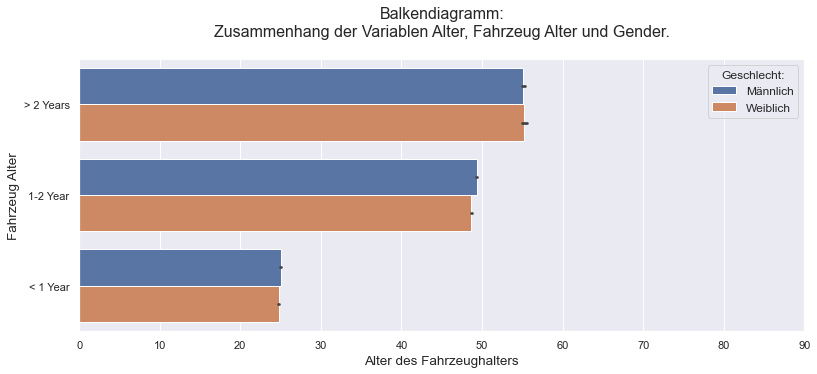

In [10]:
sns.set(rc={"figure.figsize":(13, 5)})

barplot = sns.barplot(data= datensatz, x= "Age", y= "Vehicle_Age", hue= "Gender")

h, l = barplot.get_legend_handles_labels()
labels= ["Männlich", "Weiblich"]
barplot.legend(h, labels, title= "Geschlecht:", fontsize = 12)

barplot.set_xlabel("Alter des Fahrzeughalters", fontsize = 13.5)
barplot.set_ylabel("Fahrzeug Alter", fontsize = 13.5)

barplot.set_xlim(0, 90)
barplot.set_xticks(range(0,91, 10))

barplot.set_title("Balkendiagramm:" + "\n" + "Zusammenhang der Variablen Alter, Fahrzeug Alter und Gender." + "\n", fontsize = 16)



##### 2.6.6 Boxplot der Variablen <a class="anchor" id="section_2_6_6"></a>

In [11]:
#sns.boxplot(datensatz, x= )

#### 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [12]:
datensatz.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.000341,0.002368,-0.000590,0.002368,-0.001648,0.003225,-0.002811,-0.000621,-0.001293
Age,-0.000341,1.000000,-0.254488,0.041462,-0.254488,0.265085,0.066967,-0.573078,-0.001129,0.109927
Driving_License,0.002368,-0.254488,1.000000,-0.024803,1.000000,-0.823107,0.003964,0.220666,0.002444,-0.340704
Region_Code,-0.000590,0.041462,-0.024803,1.000000,-0.024803,0.028185,-0.010439,-0.042411,-0.002689,0.010538
Previously_Insured,0.002368,-0.254488,1.000000,-0.024803,1.000000,-0.823107,0.003964,0.220666,0.002444,-0.340704
Vehicle_Damage,-0.001648,0.265085,-0.823107,0.028185,-0.823107,1.000000,0.009413,-0.224375,-0.002032,0.354412
Annual_Premium,0.003225,0.066967,0.003964,-0.010439,0.003964,0.009413,1.000000,-0.112977,-0.000593,0.022649
Policy_Sales_Channel,-0.002811,-0.573078,0.220666,-0.042411,0.220666,-0.224375,-0.112977,1.000000,-0.000051,-0.139017
Vintage,-0.000621,-0.001129,0.002444,-0.002689,0.002444,-0.002032,-0.000593,-0.000051,1.000000,-0.001019
Response,-0.001293,0.109927,-0.340704,0.010538,-0.340704,0.354412,0.022649,-0.139017,-0.001019,1.000000


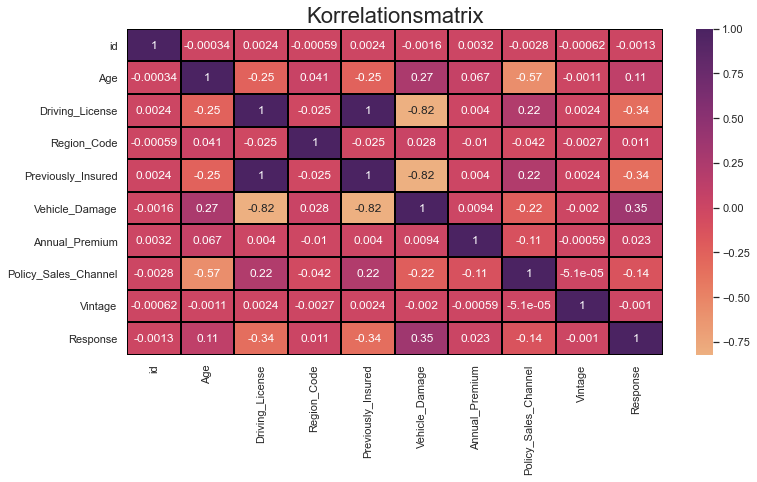

In [20]:
korrelation = datensatz.corr(method='pearson')

plt.figure(figsize=(12, 6))
sns.heatmap(korrelation, annot=True, cmap = "flare", linewidths=1, linecolor='black')
plt.title('Korrelationsmatrix', fontsize=22);

plt.show()

#### 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

### 3. Data Preparation <a class="anchor" id="chapter3"></a>   

#### 3.1 Ausreißer behandeln <a class="anchor" id="section_3_1"></a>   

TypeError: 'AxesSubplot' object is not callable